<a href="https://colab.research.google.com/github/satya006c/my-fmml/blob/main/FMML_M3Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance
#### Module Coordinator: Jashn Arora

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [ ]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [ ]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd

# Calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Modified KNN function
def k_nearest_neighbors(X_train, y_train, X_test, k=3):
    all_neighbors = []  # List to hold neighbors for each test point

    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [(euclidean_distance(test_point, X_train[i]), y_train[i]) for i in range(len(X_train))]

        # Sort by distance and select the top k closest points
        k_nearest_neighbors = sorted(distances, key=lambda x: x[0])[:k]

        # Append k-nearest neighbors with distances for this test point
        all_neighbors.append(k_nearest_neighbors)

    return all_neighbors

# Example usage:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Defining features and labels
X = np.array(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.array(df['target'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

# Getting k-nearest neighbors and distances for each test point
k_neighbors_with_distances = k_nearest_neighbors(X_train, y_train, X_test, k=7)

# Display the neighbors for each test point
for idx, neighbors in enumerate(k_neighbors_with_distances):
    print(f"Test Point {idx + 1}:")
    for distance, label in neighbors:
        print(f"  Distance: {distance:.2f}, Label: {label}")



Test Point 1:
  Distance: 0.35, Label: 0
  Distance: 0.39, Label: 0
  Distance: 0.41, Label: 0
  Distance: 0.46, Label: 0
  Distance: 0.46, Label: 0
  Distance: 0.47, Label: 0
  Distance: 0.48, Label: 0
Test Point 2:
  Distance: 0.20, Label: 1
  Distance: 0.24, Label: 1
  Distance: 0.33, Label: 1
  Distance: 0.44, Label: 2
  Distance: 0.49, Label: 1
  Distance: 0.50, Label: 1
  Distance: 0.52, Label: 1
Test Point 3:
  Distance: 0.24, Label: 2
  Distance: 0.36, Label: 2
  Distance: 0.36, Label: 2
  Distance: 0.37, Label: 2
  Distance: 0.42, Label: 2
  Distance: 0.57, Label: 2
  Distance: 0.57, Label: 2
Test Point 4:
  Distance: 0.17, Label: 1
  Distance: 0.22, Label: 1
  Distance: 0.26, Label: 1
  Distance: 0.36, Label: 1
  Distance: 0.42, Label: 1
  Distance: 0.52, Label: 1
  Distance: 0.56, Label: 1
Test Point 5:
  Distance: 0.17, Label: 2
  Distance: 0.28, Label: 2
  Distance: 0.39, Label: 2
  Distance: 0.42, Label: 1
  Distance: 0.44, Label: 1
  Distance: 0.45, Label: 1
  Distance: 

# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

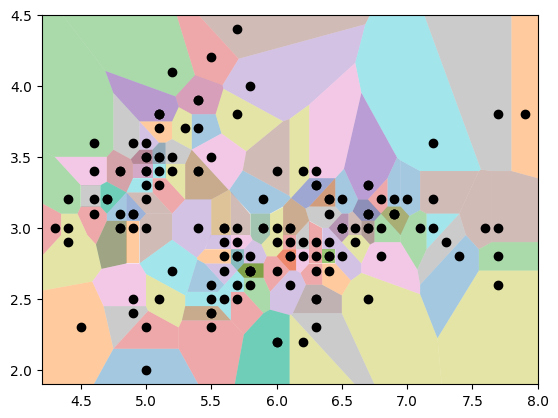

In [ ]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


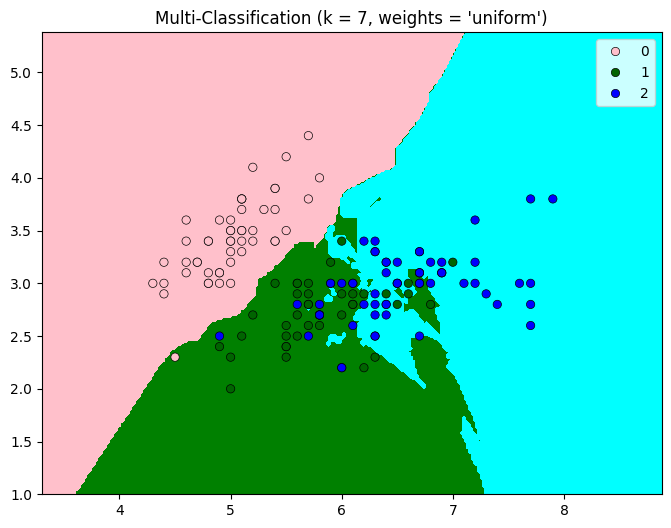

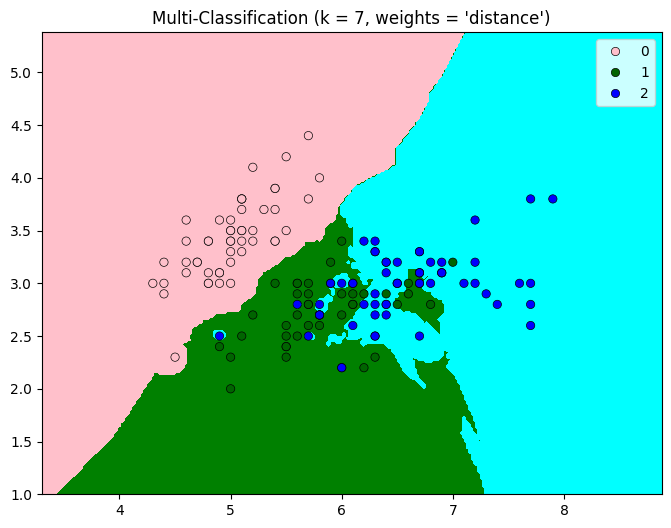

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

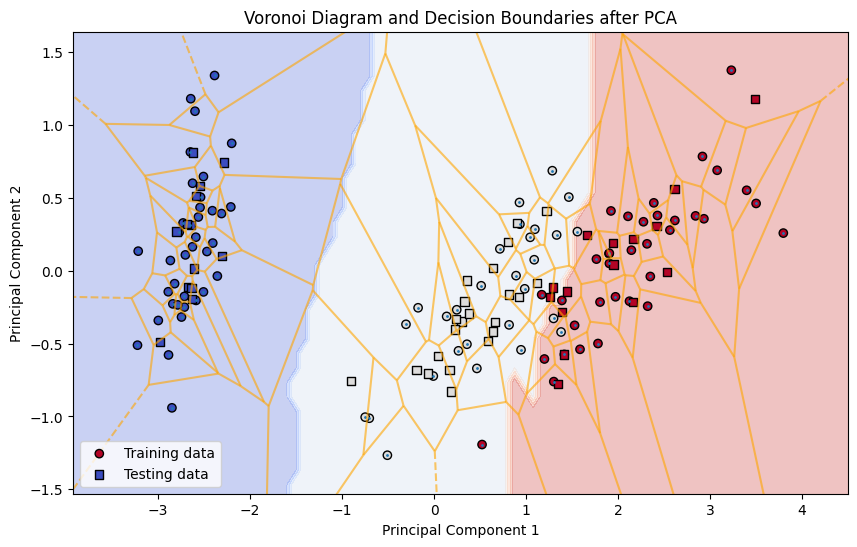

In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load and prepare the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Defining features and labels
X = np.array(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.array(df['target'])

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=17)

# Train a KNN classifier on the reduced dataset
k = 7  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained KNN to predict labels for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm, label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', cmap=plt.cm.coolwarm, label="Testing data")

# Create and plot the Voronoi diagram based on the training points
vor = Voronoi(X_train)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5, line_alpha=0.6, point_size=2)

plt.title("Voronoi Diagram and Decision Boundaries after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

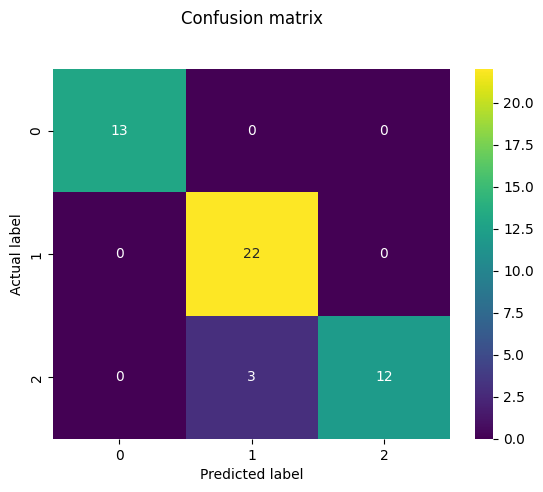

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [ ]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


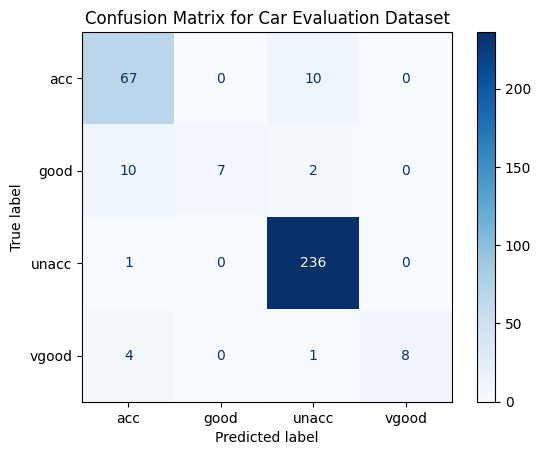

In [ ]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

# Load the Car Evaluation dataset
file_path = "car_evaluation.csv"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_df = pd.read_csv(file_path, names=column_names)

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in car_df.columns:
    label_encoders[column] = LabelEncoder()
    car_df[column] = label_encoders[column].fit_transform(car_df[column])

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders["class"].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()


In [ ]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

# Load the dataset
file_path = "car_evaluation.csv"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(file_path, names=column_names)

# Preprocess the data
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoders['class'].classes_)
print(report)

              precision    recall  f1-score   support

         acc       0.97      0.92      0.94        83
        good       0.56      0.91      0.69        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


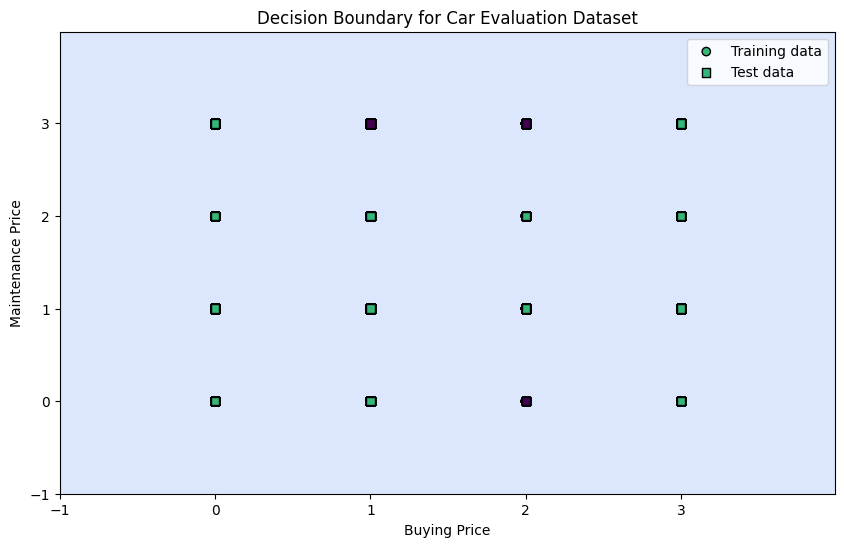

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

# Load the dataset
file_path = "car_evaluation.csv"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(file_path, names=column_names)

# Preprocess the data
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Select two features for visualization
X = data[['buying', 'maint']]
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X['buying'].min() - 1, X['buying'].max() + 1
y_min, y_max = X['maint'].min() - 1, X['maint'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train['buying'], X_train['maint'], c=y_train, edgecolor='k', marker='o', label='Training data')
plt.scatter(X_test['buying'], X_test['maint'], c=y_test, edgecolor='k', marker='s', label='Test data')
plt.xlabel('Buying Price')
plt.ylabel('Maintenance Price')
plt.title('Decision Boundary for Car Evaluation Dataset')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


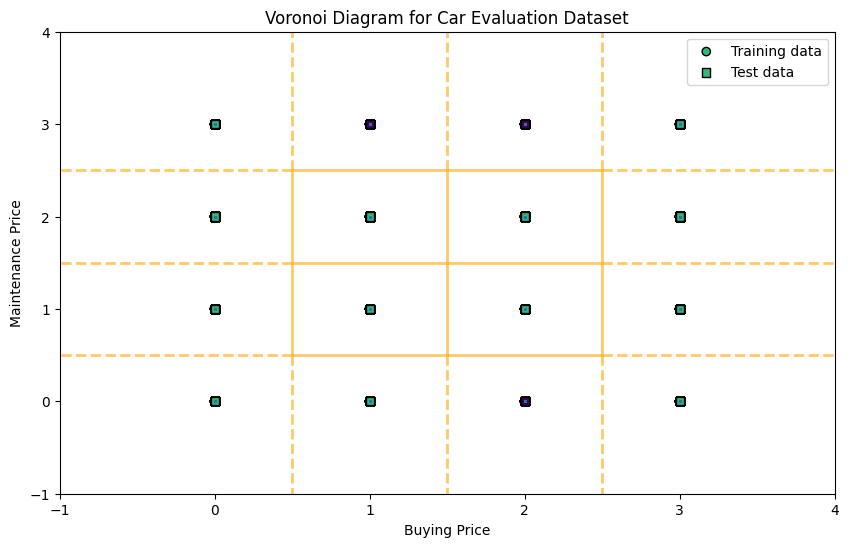

In [ ]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the dataset
file_path = "car_evaluation.csv"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(file_path, names=column_names)

# Preprocess the data
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Select two features for visualization
X = data[['buying', 'maint']]
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Create a mesh grid for plotting Voronoi diagram
x_min, x_max = X['buying'].min() - 1, X['buying'].max() + 1
y_min, y_max = X['maint'].min() - 1, X['maint'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid to get decision boundaries
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create Voronoi diagram
points = np.array(X_train)
vor = Voronoi(points)

# Plotting
plt.figure(figsize=(10, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.scatter(X_train['buying'], X_train['maint'], c=y_train, edgecolor='k', marker='o', label='Training data')
plt.scatter(X_test['buying'], X_test['maint'], c=y_test, edgecolor='k', marker='s', label='Test data')
plt.xlabel('Buying Price')
plt.ylabel('Maintenance Price')
plt.title('Voronoi Diagram for Car Evaluation Dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

**In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.**

In K-Nearest Neighbors (KNN) algorithm you get the ability to control the way in which neighbors can affect the prediction through their weights. Here's a breakdown of the two weighting options:

**1. Uniform Weights Definition:**

Uniform refers to the fact that all of the k-nearest neighbors have the same weight in the prediction model.

**Effect:**
The effectiveness of every neighbor is the same irrespective of the distance from the query point.
This may cause a weakness in sensitivity of the distribution around it or proximity to the neighboring points especially if some of these points are out of the ordinary.

**2. Distance Weights Definition:**

‘distance’ means that closer points have a higher weight by which they can affect the result than the points farther away.

**Effect:**
Neighbors are weighted conversely with distance; the closer neighbors are, the more weight they will have (e.g. weight may be equal to ( \frac{1}{distance} )).
is useful for enhancing predictive ability particularly when the variance of probabilities within a particular data sample…

Summary of Differences

**Influence:**

Uniform: It means that all the neighbors have to have equal impact on the given situation.

Distance: mores influence from neighbors nearer home.

Use Cases:
Uniform could be used depending on the situation where all neighbours may be pertinent.
Distance is better suited for datasets for which the proximity of one object to another is an indication that they are similar.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Train the classifier
knn_uniform.fit(X_train, y_train)
# Make predictions on the test set
y_pred_uniform = knn_uniform.predict(X_test)

# Create a KNN classifier with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Train the classifier
knn_distance.fit(X_train, y_train)
# Make predictions on the test set
y_pred_distance = knn_distance.predict(X_test)

# Calculate accuracy for both models
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Print the outputs
print(f"Predictions with Uniform Weights: {y_pred_uniform}")
print(f"Accuracy with Uniform Weights: {accuracy_uniform:.2f}")

print(f"Predictions with Distance Weights: {y_pred_distance}")
print(f"Accuracy with Distance Weights: {accuracy_distance:.2f}")

Predictions with Uniform Weights: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy with Uniform Weights: 1.00
Predictions with Distance Weights: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy with Distance Weights: 1.00


**What do you think could be the drawbacks of using KNN ?**

First, the K-Nearest Neighbours (KNN) algorithm has some weaknesses. One limitation of this problem is that it does not generate a general separable model; no summary equations or trees can be generated using the algorithm. Further, K NN is a lazy learning algorithm, which make no attempt to learn from the data until a new instance is presented. However, this can bring about delay in the prediction time when dealing with big data.

**Here are some other drawbacks of using KNN:**

Scalability Issues

**Computational Cost:**

However, as the number of the training examples grows, the time it takes to complete the prediction also grows. This is because while working through KNN, there is need for computation of the distances between the new data point and all training examples.

**Memory Requirements:**

At each node, KNN stores the entire training dataset, which may not be very economical whether in terms of memory or time where the data set or the feature space is large.

Noise Sensitivity & Outlier

**Noise Sensitivity:**

Interestingly, KNN is not robust to noise: noise in the data can distort the distances and thus the prediction.

**Outlier Sensitivity:**

KNN also suffers from a high variance, which means outliers have a significant influence over distances, and hence classification.

Choice of Distance Metric

**Distance Metric:**

Again it was observed that the nature of distance measure used greatly influenced the performance of KNN. It is noteworthy that distances can be measures of different kinds and may be more or less appropriate for the given data.

Choice of K

**K Value:**
Actually it is worth to stress that the choice of K can influence the KNN’s performance. The appointment of K may cause over-learning while a big appointment of K may also lead to under-learning.

Solving large data problems

**Curse of Dimensionality:**

However, the major problem of KNN is the curse of dimensionality, implying that when the number of features is multiplied the algorithm is less efficient.

Handling Imbalanced Datasets

**Imbalanced Data:**

The working of KNN can be prejudiced by overly concentrating on the majority class in the training data thus making it poorly predictors in the minority class.

Accuracy without noise: 1.00
Accuracy with noise and outliers: 0.83


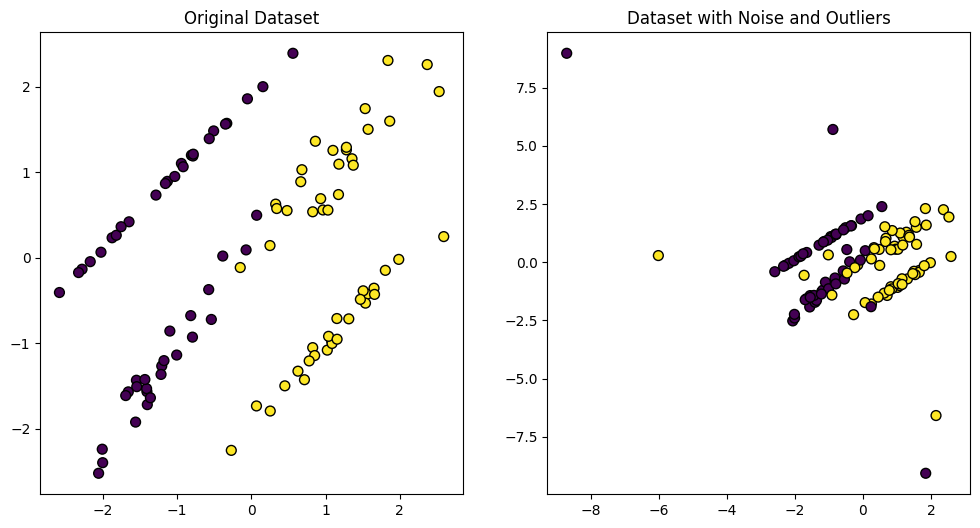

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Introduce noise and outliers
np.random.seed(42)
noise = np.random.normal(0, 1, size=(10, 2))  # 10 noisy points
outliers = np.random.uniform(-10, 10, size=(5, 2))  # 5 outliers
X_noisy = np.vstack((X, noise, outliers))
y_noisy = np.concatenate((y, np.random.randint(0, 2, size=10), np.random.randint(0, 2, size=5)))

# Split the noisy dataset
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

# Train the KNN classifier on the noisy dataset
knn.fit(X_train_noisy, y_train_noisy)

# Make predictions on the noisy test set
y_pred_noisy = knn.predict(X_test_noisy)

# Calculate accuracy on the noisy test set
accuracy_noisy = accuracy_score(y_test_noisy, y_pred_noisy)

# Print the results
print(f"Accuracy without noise: {accuracy:.2f}")
print(f"Accuracy with noise and outliers: {accuracy_noisy:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Original dataset
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Dataset")

# Noisy dataset
plt.subplot(1, 2, 2)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap='viridis', edgecolor='k', s=50)
plt.title("Dataset with Noise and Outliers")

plt.show()

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
